# **Feature Extraction for Images**

Feature extraction is a crucial step in many computer vision tasks, such as object recognition, image classification, and pattern recognition. It involves identifying and extracting significant features from images that can be used for further analysis or as input to machine learning models. Features can be low-level, like **edges**, or high-level, like **shapes and objects**. Here’s an in-depth look at feature extraction methods:

1. **Low Level Features:** Low-level features are the most basic features extracted directly from the pixel values of an image. They include information like edges, corners, textures, and color, which are primitive and local to small regions of the image.
    - Sobel Operator: Detects edges.
    - Canny Edge Detector: Detects edges using a multi-stage algorithm.

2. **Medium Level Features**
    - Scale-Invariant Feature Transform (SIFT): Detects keypoints and computes descriptors that are invariant to scale and rotation. **[Click here](https://www.ipol.im/pub/art/2014/82/?utm_source=doi)** to read a paper on SIFT.
    - Histogram of Oriented Gradients (HOG): Describes the distribution of gradient orientations in localized portions of an image.

3. **High Level Features:** High-level features are more abstract and often represent the structural and semantic aspects of the image. These features are typically derived from the combination and processing of low-level features.
    - Shape Features using Contours: Find contours to describe the shape of objects. 
    - Region-based Features using Segmentation: Segment an image into meaningful regions
    
4. **Deep Learning Based Features**
    - Convolutional Neural Network

**Important Note:** 
- Both sobel operator and contour detection are involved in identifying edges in images, but they serve different purposes and operate at different levels of abstraction.
- Sobel operator is a low-level feature extractor providing detailed gradient information, while contour detection is a high-level feature extractor providing structural information about object boundaries.
- Contour detection involves identifying and tracing the boundaries of objects within an image, often after edge detection has been performed.

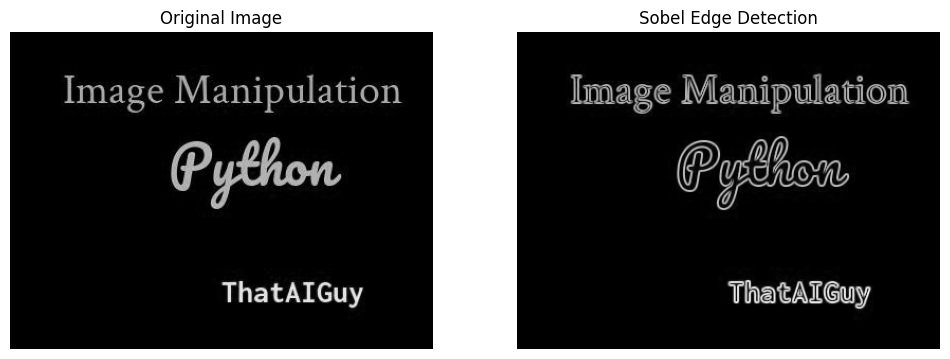

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load and convert the image to grayscale
image = io.imread('images/original_imgs/python_image_manipulation.jpg')
gray_image = color.rgb2gray(image)

# Apply Sobel filter
sobel_edges = filters.sobel(gray_image)

# Display the original and Sobel filtered images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(sobel_edges, cmap='gray')
ax[1].set_title('Sobel Edge Detection')
ax[1].axis('off')

plt.show()


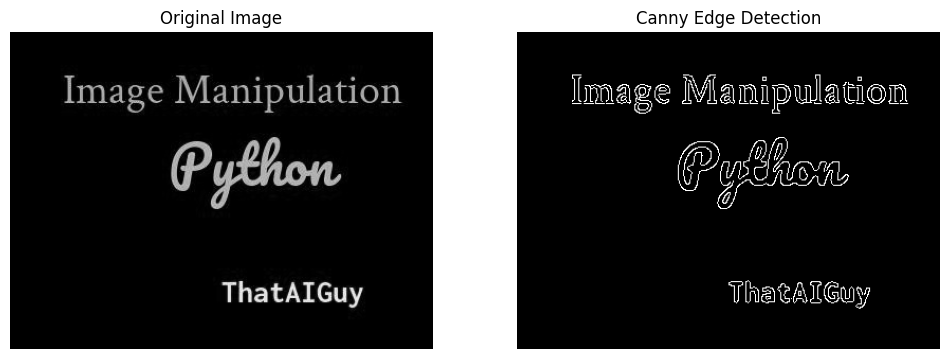

In [2]:
from skimage import feature

# Apply Canny edge detector
canny_edges = feature.canny(gray_image, sigma=1.0)

# Display the original and Canny edge detected images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(canny_edges, cmap='gray')
ax[1].set_title('Canny Edge Detection')
ax[1].axis('off')

plt.show()

In [12]:
canny_edges

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# Assuming fruits are recognized and bounding boxes are obtained
# Display the original image with bounding boxes and labels


plt.imshow(image)
for box, label in zip(bounding_boxes, fruit_labels):
    x, y, w, h = box
    plt.rectangle((x, y), w, h, color='red', linewidth=2)
    plt.text(x, y-10, label, color='red')
plt.title('Detected Fruits')
plt.axis('off')
plt.show()

### **SIFT**

`skimage` does not directly support SIFT, as SIFT is patented and not included in the library. However, it does have an implementation for a similar algorithm called ORB (Oriented FAST and Rotated BRIEF), which is designed to be a fast alternative to SIFT and SURF and is not patented.

**ORB (Oriented FAST and Rotated BRIEF)**

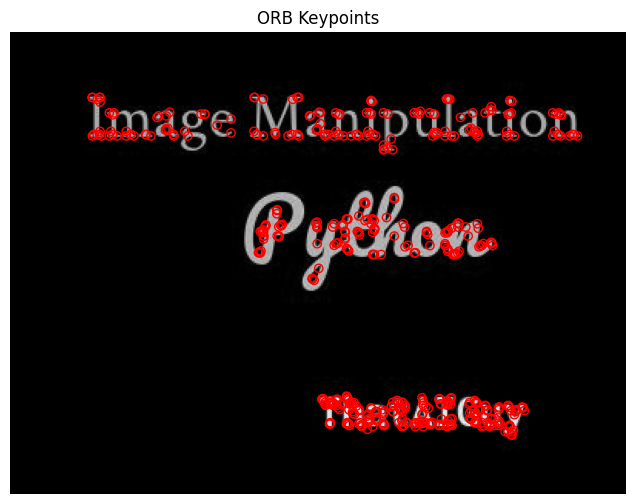

Number of keypoints detected: 500


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature

# Load and convert the image to grayscale
image = io.imread('images/original_imgs/python_image_manipulation.jpg')
gray_image = color.rgb2gray(image)

# Initialize ORB detector
orb = feature.ORB(n_keypoints=500)

# Detect keypoints
orb.detect_and_extract(gray_image)
keypoints = orb.keypoints

# Plot keypoints
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(gray_image, cmap=plt.cm.gray)
ax.scatter(keypoints[:, 1], keypoints[:, 0], facecolors='none', edgecolors='r')
ax.set_title('ORB Keypoints')
ax.axis('off')

plt.show()

# Print some details about the keypoints
print(f"Number of keypoints detected: {len(keypoints)}")

**Important Note:**  
**Keypoints (or interest points)** are specific locations in an image that are identified as being distinct and informative. These points are selected based on certain properties, such as corners, blobs, or other patterns that are easily recognizable and stable across different views of the same scene.

**Descriptors** are vector representations of the local image region around each keypoint. They capture the appearance and structure of the keypoint in a way that is robust to changes in scale, rotation, and (to some extent) illumination. The descriptor provides a compact summary of the local image patch, which can be used to compare keypoints across different images.

**Why Extract Keypoints and Descriptors?**
1. **Invariance to Transformations**
    - **Scale Invariance:** Keypoints and their descriptors can be detected at multiple scales, allowing the same features to be identified regardless of the image size.  
    - **Rotation Invariance:** Descriptors are often designed to be invariant to rotation, making them robust to changes in orientation.  
    - **Affine Invariance:** Some descriptors can handle affine transformations, which include scaling, rotation, and skewing.  

2. **Robustness to Noise and Illumination Changes**
    - Good descriptors can capture essential patterns in the image that are less affected by noise or variations in lighting conditions.

3. **Matching and Recognition**
    - Keypoints and descriptors enable the matching of corresponding points between different images. This is fundamental for tasks such as image stitching, object recognition, and 3D reconstruction.

4. **Efficiency**
    - Using keypoints and descriptors allows for efficient comparison and retrieval of images. Instead of comparing entire images, the comparison can be based on a few distinctive keypoints and their descriptors.

5. **Applications**
    - **Object Recognition:** Identifying objects in different scenes or images by matching keypoints.
    - **Image Stitching:** Combining multiple images to create a panorama by finding correspondences between images.
    - **3D Reconstruction:** Reconstructing a 3D scene from multiple 2D images by finding common keypoints in different views.
    - **Robotics and Navigation:** Using visual features for localization and mapping in robotics.

## **SIFT**
The SIFT algorithm was developed by David Lowe [1], [2] and later patented by the University of British Columbia. Since the patent expired in 2020 it’s free to use. The implementation here closely follows the detailed description in [3], including use of the same default parameters.

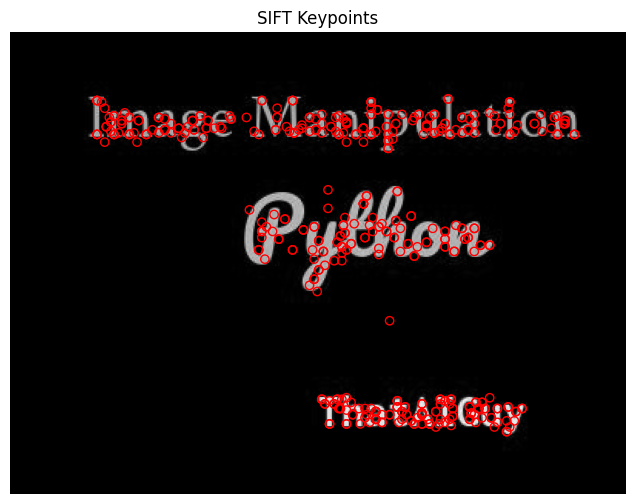

Number of keypoints detected: 459


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature

# Load and convert the image to grayscale
image = io.imread('images/original_imgs/python_image_manipulation.jpg')
gray_image = color.rgb2gray(image)

# Initialize ORB detector
sift = feature.SIFT()

# Detect keypoints
sift.detect_and_extract(gray_image)
keypoints = sift.keypoints

# Plot keypoints
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(gray_image, cmap=plt.cm.gray)
ax.scatter(keypoints[:, 1], keypoints[:, 0], facecolors='none', edgecolors='r')
ax.set_title('SIFT Keypoints')
ax.axis('off')

plt.show()

# Print some details about the keypoints
print(f"Number of keypoints detected: {len(keypoints)}")

### **HOG**

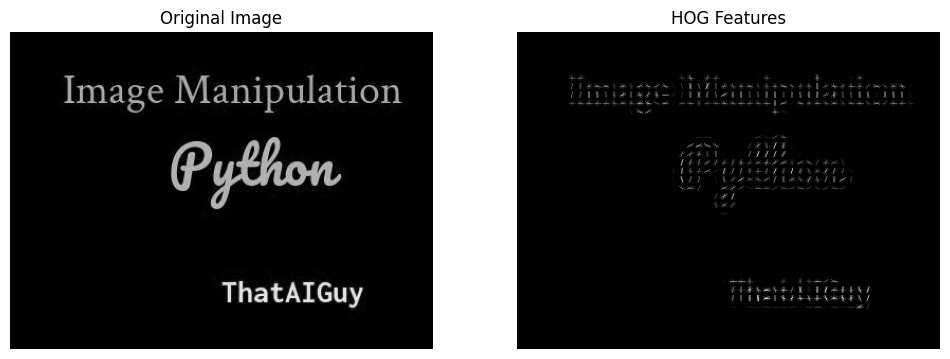

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature

# Load and convert the image to grayscale
image = io.imread('images/original_imgs/python_image_manipulation.jpg')
gray_image = color.rgb2gray(image)

# Compute HOG features
hog_features, hog_image = feature.hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Display the original and HOG image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(hog_image, cmap='gray')
ax[1].set_title('HOG Features')
ax[1].axis('off')

plt.show()

Face detection using a cascade classifier


https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

### **Contours**

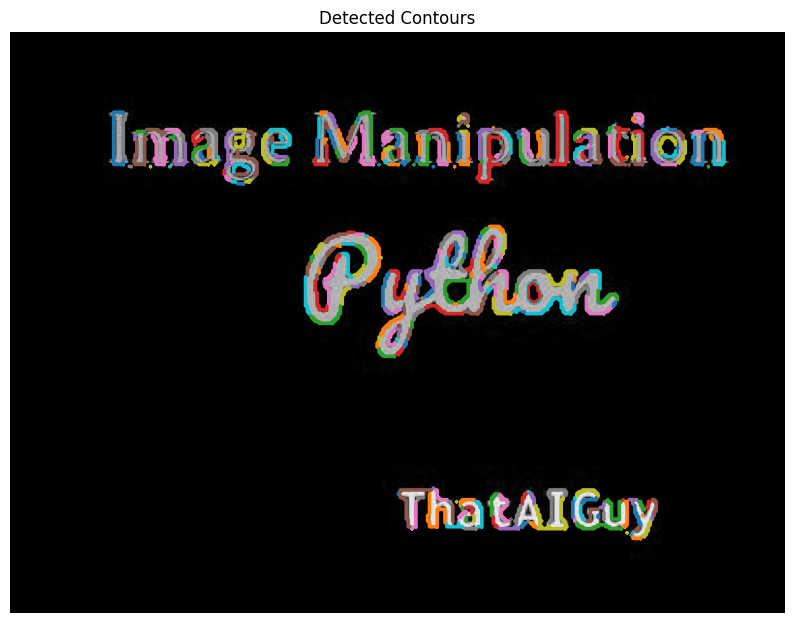

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, measure

# Load and convert the image to grayscale
image = io.imread('images/original_imgs/python_image_manipulation.jpg')
gray_image = color.rgb2gray(image)

# Apply Canny edge detector
edges = feature.canny(gray_image, sigma=2.0)

# Find contours
contours = measure.find_contours(edges, level=0.8)

# Display the original image and contours
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray_image, cmap=plt.cm.gray)
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.set_title('Detected Contours')
ax.axis('off')
plt.show()


Explanation
1. Loading and Preprocessing:
2. The image is loaded and converted to grayscale.
3. Edge Detection:
The Canny edge detector is applied to find edges in the image.
4. Finding Contours:
Contours are found using the measure.find_contours method, which traces the boundaries of the detected edges.
5. Visualization:
The original grayscale image is displayed with the detected contours overlaid.


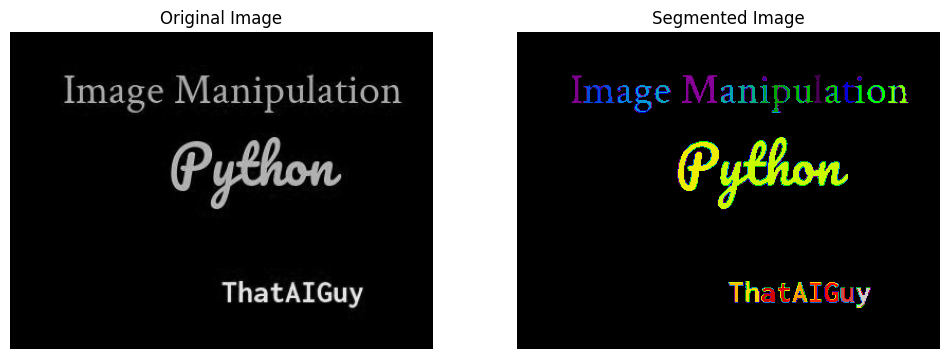

Region: 2, Area: 106.0, Bounding Box: (42, 52, 68, 61)
Region: 3, Area: 314.0, Bounding Box: (42, 156, 68, 189)
Region: 7, Area: 206.0, Bounding Box: (51, 63, 68, 92)
Region: 8, Area: 105.0, Bounding Box: (51, 95, 68, 109)
Region: 9, Area: 181.0, Bounding Box: (51, 111, 77, 127)
Region: 10, Area: 106.0, Bounding Box: (51, 130, 68, 145)
Region: 11, Area: 103.0, Bounding Box: (51, 193, 68, 207)
Region: 12, Area: 137.0, Bounding Box: (51, 209, 68, 228)
Region: 14, Area: 156.0, Bounding Box: (51, 241, 77, 258)
Region: 15, Area: 120.0, Bounding Box: (51, 261, 68, 280)
Region: 16, Area: 105.0, Bounding Box: (51, 292, 68, 306)
Region: 18, Area: 118.0, Bounding Box: (51, 331, 68, 348)
Region: 19, Area: 130.0, Bounding Box: (51, 351, 68, 370)
Region: 20, Area: 2373.0, Bounding Box: (100, 190, 168, 313)
Region: 21, Area: 821.0, Bounding Box: (104, 152, 151, 191)
Region: 22, Area: 142.0, Bounding Box: (236, 216, 256, 229)
Region: 24, Area: 128.0, Bounding Box: (237, 260, 256, 275)
Region: 25, Are

In [11]:
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

# Load and convert the image to grayscale
image = io.imread('images/original_imgs/python_image_manipulation.jpg')
gray_image = color.rgb2gray(image)

# Apply Otsu's thresholding
thresh = threshold_otsu(gray_image)
binary = gray_image > thresh

# Label the segmented regions
label_image = label(binary)

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(gray_image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(label_image, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

# Print some properties of the segmented regions
for region in regionprops(label_image):
    if region.area >= 100:  # Skip small regions
        print(f"Region: {region.label}, Area: {region.area}, Bounding Box: {region.bbox}")


Explanation
1. Loading and Preprocessing:
The image is loaded and converted to grayscale.
2. Thresholding:
Otsu's method is used to determine an optimal threshold value for binary segmentation.
3. Labeling Segments:
The segmented binary image is labeled to identify distinct regions.
4. Visualization:
The original and segmented images are displayed side by side.
5. Region Properties:
Properties of the segmented regions (such as area and bounding box) are printed.

Benefits of High-Level Feature Extraction
1. Object Recognition and Detection:
Identifying contours and segmenting images helps in recognizing and detecting objects within the image.
2. Image Analysis:
High-level features provide detailed information about the structure and composition of the image, aiding in analysis and interpretation.
3. Computer Vision Applications:
Tasks such as medical image analysis, autonomous driving, and robotics heavily rely on accurate contour detection and segmentation for understanding the environment.
4. Efficiency:
By segmenting an image into meaningful parts, processing and analysis can be more focused and efficient.

Conclusion  
High-level feature extraction techniques like contour detection and image segmentation are essential for understanding the structure and content of images. Contours help in identifying the shapes and boundaries of objects, while segmentation divides the image into meaningful regions. These techniques are fundamental in advanced computer vision applications, providing a deeper understanding of the visual information. Using skimage, we can efficiently implement these methods and apply them to various tasks in image processing and analysis.

## **Image Processing Pipeline**
1. Preprocessing:
    - Convert images to grayscale or appropriate color space.
    - Apply noise reduction if necessary (e.g., Gaussian blur).

2. Low-Level Feature Extraction:
    - Extract basic features such as edges and textures using techniques like Sobel operator and Canny edge detector.

3. Medium-Level Feature Extraction:
    - Detect and describe keypoints using methods like ORB (or SIFT if available).
    - Extract more complex patterns and shapes using HOG.

4. High-Level Feature Extraction:
    - Detect contours to identify the boundaries of objects.
    - Segment the image to divide it into meaningful regions.


## **Benefits of This Pipeline**

1. Comprehensive Analysis: Combines different levels of feature extraction to provide a detailed analysis of the image.
2. Robustness: By extracting multiple types of features, the pipeline becomes robust to various changes and noise in the image.
3. Versatility: This approach can be applied to a wide range of applications, from basic image analysis to complex object recognition tasks.
